In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pylab as plt
import datetime
import numpy as np
plt.rcParams['figure.figsize'] = (14, 6)

In [3]:
# DestructiveSizeName
DestructiveSizeName = {'1 - Harmløst(sluff)': 0.01,
                      '2 - Små': 0.1,
                      '3 - Middels': 1,
                      '4 - Store': 10,
                      '5 - Svært store': 100}

# EstimatedNumTID
EstimatedNumTID = {
    '1':1,
    '2':3,
    '3':8,
    '4':12
}

In [4]:
example_sizes = [['3 - Middels', '4 - Store'],['3 - Middels', '2 - Små'], ['1 - Harmløst(sluff)', '2 - Små']]
example_amount = [['2', '1'], ['2', '4'], ['4', '3']]

[[  1.00000000e+00   3.00000000e+00   9.00000000e+00   2.70000000e+01]
 [  4.00000000e+00   1.20000000e+01   3.60000000e+01   1.08000000e+02]
 [  1.60000000e+01   4.80000000e+01   1.44000000e+02   4.32000000e+02]
 [  6.40000000e+01   1.92000000e+02   5.76000000e+02   1.72800000e+03]
 [  2.56000000e+02   7.68000000e+02   2.30400000e+03   6.91200000e+03]]


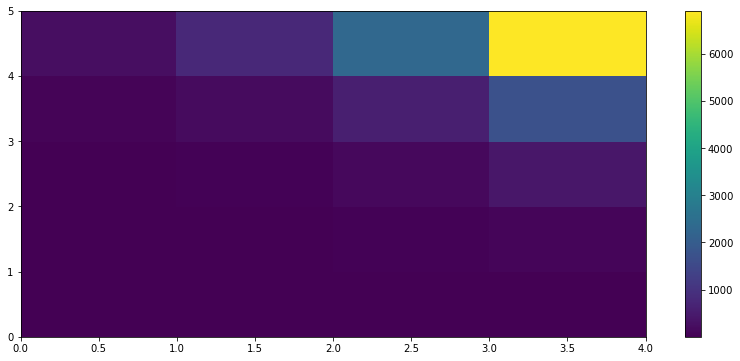

In [10]:
# Size factor
size_factor = 4.0
amount_factor = 3.0

# look-up table
LUT = np.array([[1.0, amount_factor, amount_factor**2, amount_factor**3],
               [size_factor, size_factor*amount_factor, size_factor*amount_factor**2, size_factor*amount_factor**3],
               [size_factor**2, size_factor**2 * amount_factor, size_factor**2 * amount_factor**2, size_factor**2 *amount_factor**3],
               [size_factor**3, size_factor**3 * amount_factor, size_factor**3 * amount_factor**2, size_factor**3 * amount_factor**3],
               [size_factor**4, size_factor**4 * amount_factor, size_factor**4 * amount_factor**2, size_factor**4 * amount_factor**3]])

print(LUT)
plt.pcolor(LUT)
plt.colorbar()

In [43]:
result = []
for s, n in zip(example_sizes, example_amount):
    day_score = []
    for si, ni in zip(s ,n):
        day_score.append(DestructiveSizeName[si] * EstimatedNumTID[ni]) # calculate individual scores
        print("{0} {1} = {2}".format(DestructiveSizeName[si], EstimatedNumTID[ni], day_score[-1]))
    result.append(np.sum(day_score)) # sum up daily scores
print(result)

1 3 = 3
10 1 = 10
1 3 = 3
0.1 12 = 1.2000000000000002
0.01 12 = 0.12
0.1 8 = 0.8
[13, 4.2000000000000002, 0.92000000000000004]


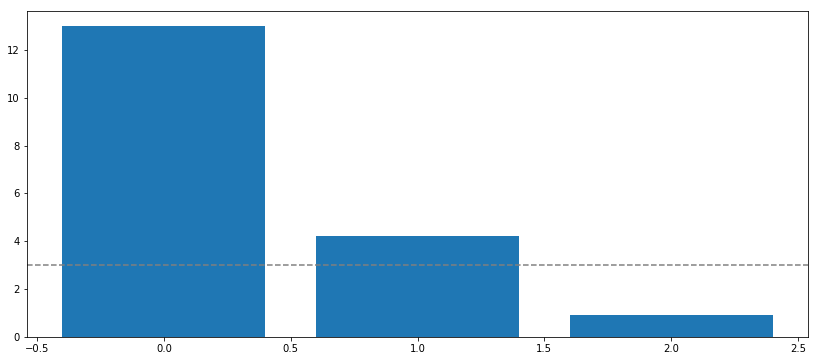

In [44]:
plt.bar(left=range(len(result)), height=result)
plt.axhline(3, linestyle='--', color='grey') # a value of 3 corresponds to considerable avalanche activity

TODO:
Make an index for all observations of avalanche activity and a separate one regarding observerse with >=\*\*\* only.
